 ## Домашнее задание Проверка гипотез

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math

In [2]:
# Функция для построения Гистограмм

def draw_hist(data, legend, bins_num=30):
  fig, ax = plt.subplots(figsize=(10, 7.5))

  for x, legend_ in zip(data, legend):
    plt.hist(x, bins=bins_num, label=legend_, alpha=0.6)

  ax.legend()


  ax.set_ylabel(f'Кол-во данных')
  ax.set_title(f'Распределение данных')
  plt.tick_params(axis='x', rotation=30)
  ax.grid(axis='y')

  plt.show()

In [3]:
# Тест Шапиро-Уилка на нормальность, буду использовать
# его для проверки (и для наглядности также будем строить график):

def check_normality(data, plot_graph=False, legend=None, bins_num=30):

    sighificance = 0.05
    #statistics, p_val = stats.kstest(data, 'norm')
    statistics, p_val = stats.shapiro(data)
    #

    if (p_val < sighificance):
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально\n")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально\n")

    if (plot_graph):
      draw_hist(data=[data], legend=legend, bins_num=bins_num)

Отклоняем нулевую гипотезу >> Данные распределены не нормально



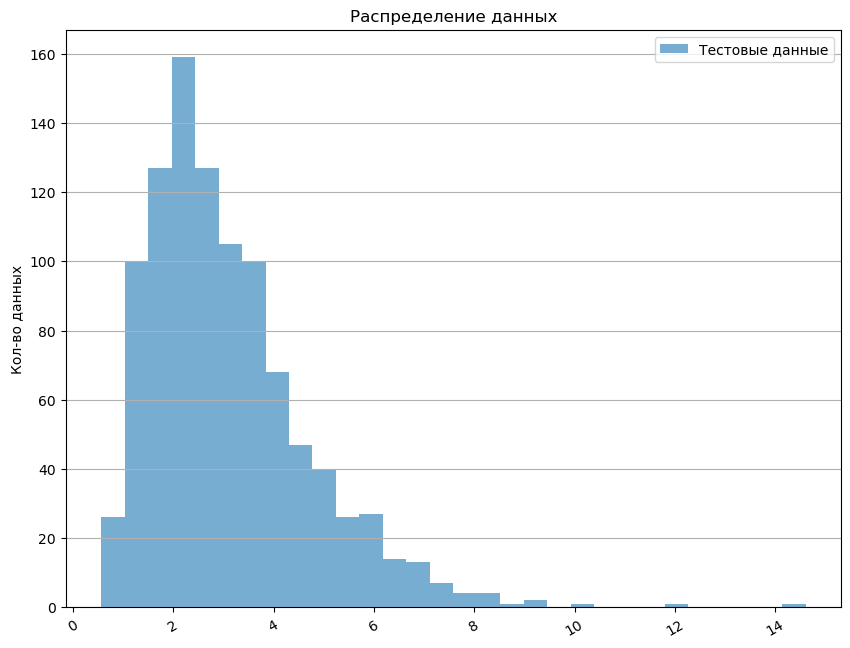

In [4]:
# создатим тестовый набор данных с логнормальным распределением и проверим его
# на нормальность с помощью созданной функции:

lognorm_dataset = stats.lognorm.rvs(s=0.5, scale=math.exp(1), size=1000)

check_normality(lognorm_dataset, plot_graph=True, legend=['Тестовые данные'], bins_num=30)

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [5]:
np.random.seed(42) #фиксация случайности

men  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
women = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

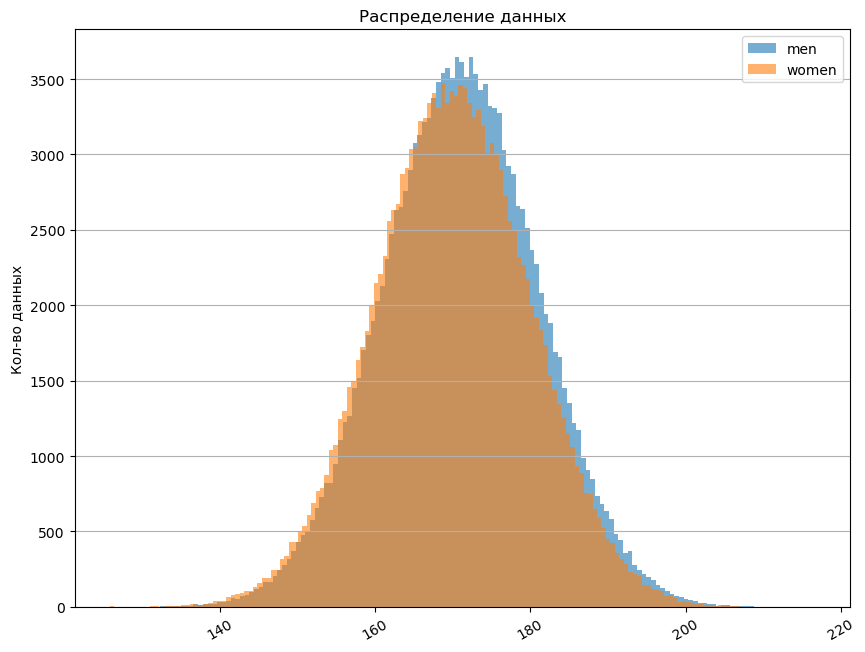

In [6]:
draw_hist([men, women], ['men', 'women'], 150)

In [7]:
# H0 - различие между выборками незначительно
# H1 - различие между выборками значительно

statistics, p = stats.ttest_ind(men, women)
alpha = 0.001

print(f'Статистика = {statistics}, p-value = {p}')

if p > alpha:
  print('Принимаем нулевую гипотезу, различие незначительно')
else:
  print('Отклоняем нулевую гипотезу, различие значительно')

Статистика = 28.313635693327363, p-value = 4.013049237709119e-176
Отклоняем нулевую гипотезу, различие значительно


Результат является статистически значимым (с уровнем доверия 0.999). Практическая польза результата заключается в выяснении того, что две эти выборки нельзя считать выборками из какой-то одной генеральной совокупности с ростом 170 (или 171) см.

In [8]:
# Для наглядности также хочу сравнить доверительные интервалы для средних:

interval_dict = {}
name_data = {'men' : men,
             'women' : women}
for key, val in name_data.items():
  z_a = stats.norm.ppf(1-alpha/2)
  std_ = val.std()
  size_n = len(val)
  delta = (std_/np.sqrt(size_n))*z_a
  interval_dict[key] = [val.mean() - delta, val.mean() + delta]

  print(f'{key} :', interval_dict[key])
print('--------------------------------')
print('Разница между границами (men[0] - women[1]):', interval_dict['men'][0] - interval_dict['women'][1])

men : [170.93334607814086, 171.10334579588726]
women : [169.89968038972856, 170.06948865566707]
--------------------------------
Разница между границами (men[0] - women[1]): 0.8638574224737852


<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [9]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

Проверка датасета test_team на нормальность:
Отклоняем нулевую гипотезу >> Данные распределены не нормально

Проверка датасета developer_team на нормальность:
Отклоняем нулевую гипотезу >> Данные распределены не нормально



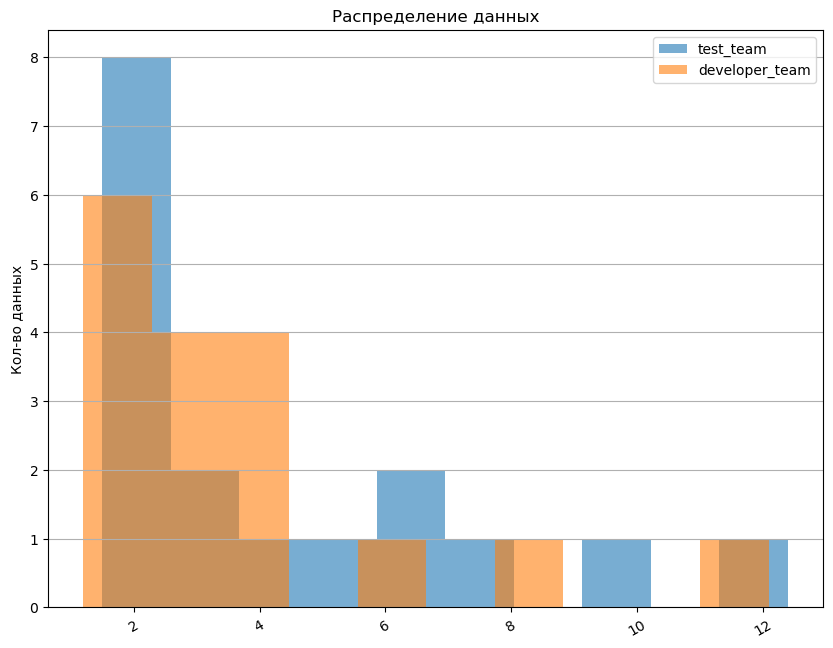

In [10]:
# Первым делом проверим оба набора данных на нормальность распределения:

print(f'Проверка датасета test_team на нормальность:')
check_normality(test_team)
print(f'Проверка датасета developer_team на нормальность:')
check_normality(developer_team)

# Получили вывод, что оба набора данных распределены не нормально (что также
# видно на гистограмме)

draw_hist([test_team, developer_team], ['test_team', 'developer_team'], 10)

In [11]:
# Т.к. распределение данных не нормальное, будем использовать Тест Манна-Уитни
# для сравнения распределений:

# H0 - различие в переутомлении между командами незначительно
# H1 - различие в переутомлении между командами значительно

statistics, p = stats.mannwhitneyu(test_team, developer_team)
alpha = 0.05

print(f'Статистика = {statistics}, p-value = {p}')

if p > alpha:
  print('Принимаем нулевую гипотезу, различие незначительно')
else:
  print('Отклоняем нулевую гипотезу, различие значительно')

Статистика = 151.5, p-value = 0.8226484074918565
Принимаем нулевую гипотезу, различие незначительно


<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [12]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

Проверка датасета only_breast на нормальность:
Не отклоняем нулевую гипотезу >> Данные распределены нормально

Проверка датасета only_formula на нормальность:
Не отклоняем нулевую гипотезу >> Данные распределены нормально

Проверка датасета both на нормальность:
Не отклоняем нулевую гипотезу >> Данные распределены нормально



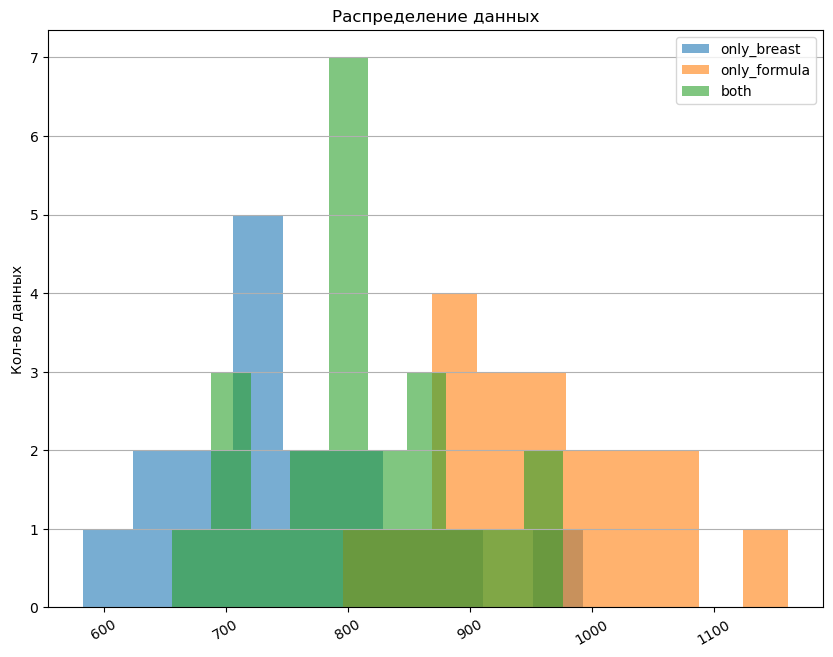

In [13]:
# Первым делом проверим каждый набор данных на нормальность распределения:

print(f'Проверка датасета only_breast на нормальность:')
check_normality(only_breast)
print(f'Проверка датасета only_formula на нормальность:')
check_normality(only_formula)
print(f'Проверка датасета both на нормальность:')
check_normality(both)

# Получили вывод, что все три набора данных распределены нормально (что примерно
# видно на гистограмме)

draw_hist([only_breast, only_formula, both], ['only_breast', 'only_formula', 'both'], 10)

In [14]:
# Для проверки наличия/отсутствия различий между группами, я хочу использовать
# однофакторный дисперсионный анализ. Но перед использованием нужно убедиться,
# что дисперсии групп примерно равны. Я прочитала, что это можно определить с
# помощью теста Бартлетта:

statistics, p = stats.bartlett(only_breast, only_formula, both)
alpha = 0.05

print(f'Статистика = {statistics}, p-value = {p}')

if p > alpha:
  print('Дисперсии групп примерно равны')
else:
  print('Дисперсии групп не равны')

Статистика = 1.1025213302122114, p-value = 0.5762229281603594
Дисперсии групп примерно равны


In [15]:
# Наконец, применим ANOVA

# H0 - среднемесячная прибавку в весе у новорожденных в каждой группе равна
# H1 - среднемесячная прибавку в весе у новорожденных по-крайней мере в одной
# группе отличается от остальных

statistics, p = stats.f_oneway(only_breast, only_formula, both)
alpha = 0.05

print(f'Статистика = {statistics}, p-value = {p}')

if p > alpha:
  print('Прибавки в весе равны между группами')
else:
  print('Как-минимум в одной группе прибавка в весе отличается от остальных')

Статистика = 26.701251857537958, p-value = 7.18623550288582e-09
Как-минимум в одной группе прибавка в весе отличается от остальных


Выводы:

По итогу проверки получили результат, что выбор варианта вскармливания статистически значимо влияет на прибавку в весе у новорожденных. Разницу вариантов вскармливания можно также заметить на результах гистограмм. Видно, что использование только смесей для вскармливания наиболее сильно влияет на прибавку в весе. Далее идет комбинированный вариант вскармливания, и уже последним идет вскармливание на грудном молоке.


---

